In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set(color_codes=True)

In [2]:
analytics = pd.read_csv('hamburger_menu.csv')
analytics.head()

,Date,TimeParting,UserID,HeaderItemClicked,HeaderItemClickedURL,SidebarMenuClicks
0,1-Sep-20,10:00 AM|Tuesday,alclarke,Technology > Pages > IT self service,https://resources.deloitte.com/sites/UK/Pages/...,1.0
1,1-Sep-20,10:00 AM|Tuesday,almaguire,Quick Links > Workday,https://wd3.myworkday.com/wday/authgwy/deloitt...,1.0
2,1-Sep-20,10:00 AM|Tuesday,annbosco,Clients & Industries > About Clients & Industries,https://resources.deloitte.com/sites/it/climar...,1.0
3,1-Sep-20,10:00 AM|Tuesday,apettit,Workplace & Technology > Workplace & Technolog...,https://deloittenet.deloitte.com/sites/MyTechn...,1.0
4,1-Sep-20,10:00 AM|Tuesday,chmacmanus,Quick Links > Audit and Assurance Technical Hub,https://resources.deloitte.com/sites/ie/servic...,1.0


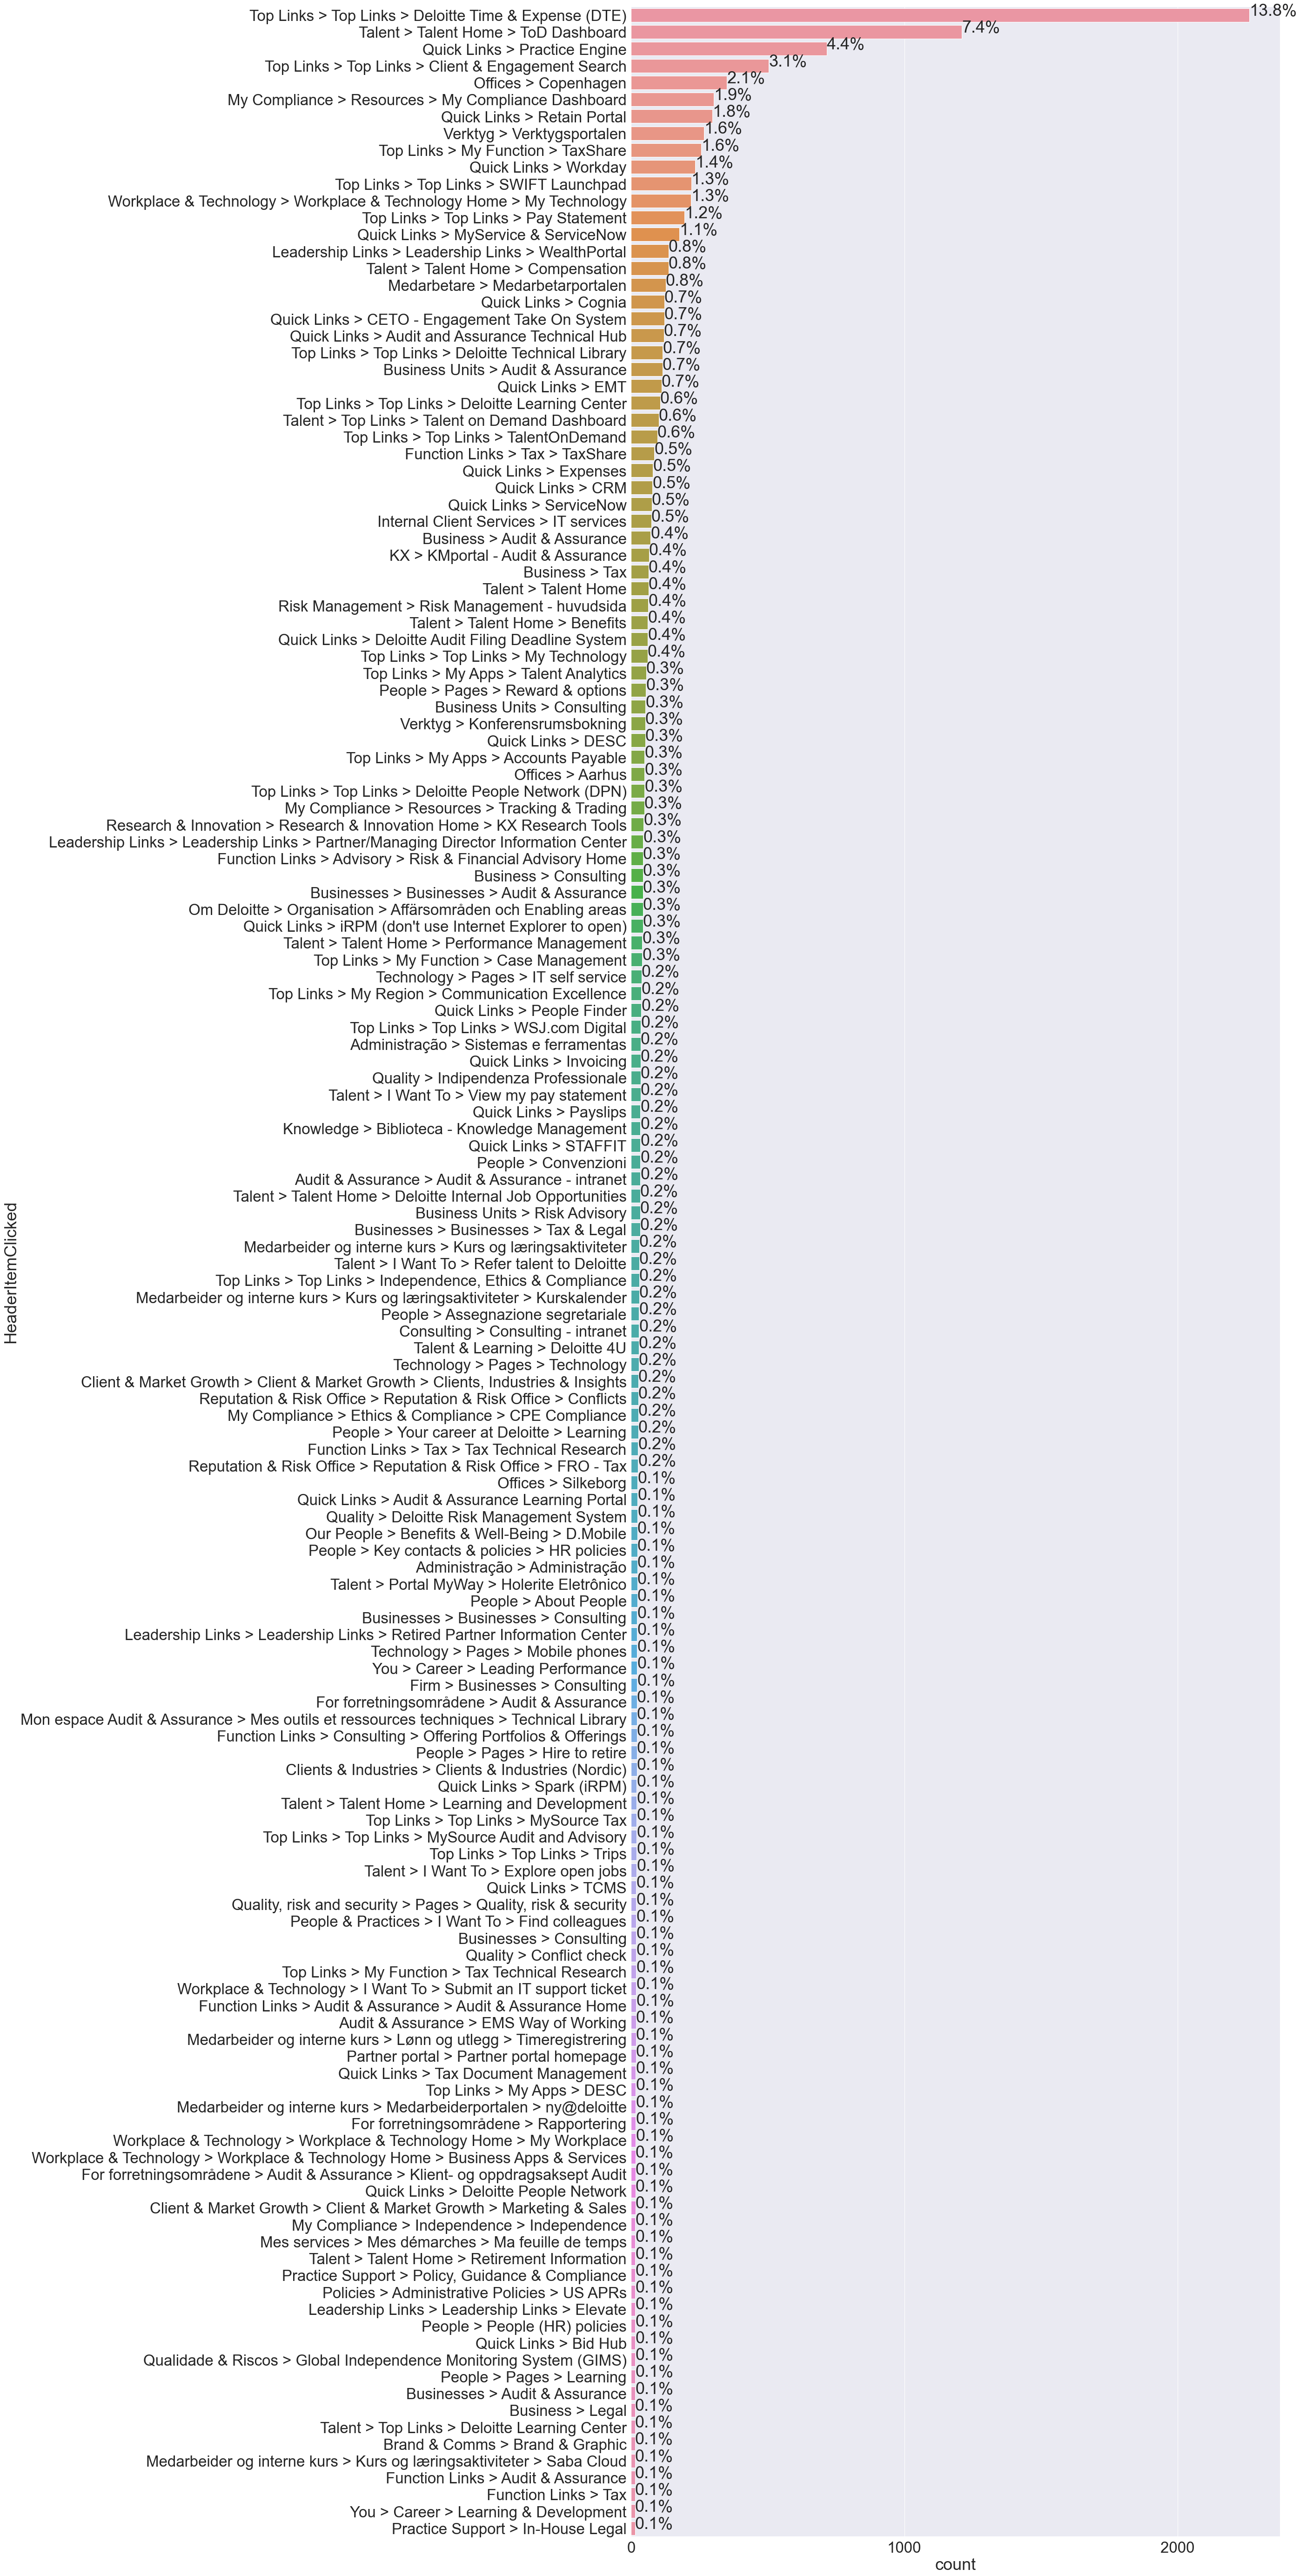

In [7]:
plt.figure(figsize=(25,100))
sns.set(font_scale=3) 
sns.set_style("darkgrid")


ax = sns.countplot(y="HeaderItemClicked", data=analytics,order=analytics.HeaderItemClicked.value_counts().iloc[:150].index)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())


total = len(analytics['HeaderItemClicked'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [9]:
analytics['Date'] = pd.to_datetime(analytics['Date'], format='%d-%b-%y')
analytics['day_of_week'] = analytics['Date'].dt.day_name()

In [10]:
analytics.head()

,Date,TimeParting,UserID,HeaderItemClicked,HeaderItemClickedURL,SidebarMenuClicks,day_of_week
0,2020-09-01,10:00 AM|Tuesday,alclarke,Technology > Pages > IT self service,https://resources.deloitte.com/sites/UK/Pages/...,1.0,Tuesday
1,2020-09-01,10:00 AM|Tuesday,almaguire,Quick Links > Workday,https://wd3.myworkday.com/wday/authgwy/deloitt...,1.0,Tuesday
2,2020-09-01,10:00 AM|Tuesday,annbosco,Clients & Industries > About Clients & Industries,https://resources.deloitte.com/sites/it/climar...,1.0,Tuesday
3,2020-09-01,10:00 AM|Tuesday,apettit,Workplace & Technology > Workplace & Technolog...,https://deloittenet.deloitte.com/sites/MyTechn...,1.0,Tuesday
4,2020-09-01,10:00 AM|Tuesday,chmacmanus,Quick Links > Audit and Assurance Technical Hub,https://resources.deloitte.com/sites/ie/servic...,1.0,Tuesday


In [11]:
friday_data = analytics[analytics.day_of_week.eq('Friday')]
friday_data

,Date,TimeParting,UserID,HeaderItemClicked,HeaderItemClickedURL,SidebarMenuClicks,day_of_week


In [12]:
analytics.day_of_week.unique() 

array(['Tuesday', 'Wednesday'], dtype=object)

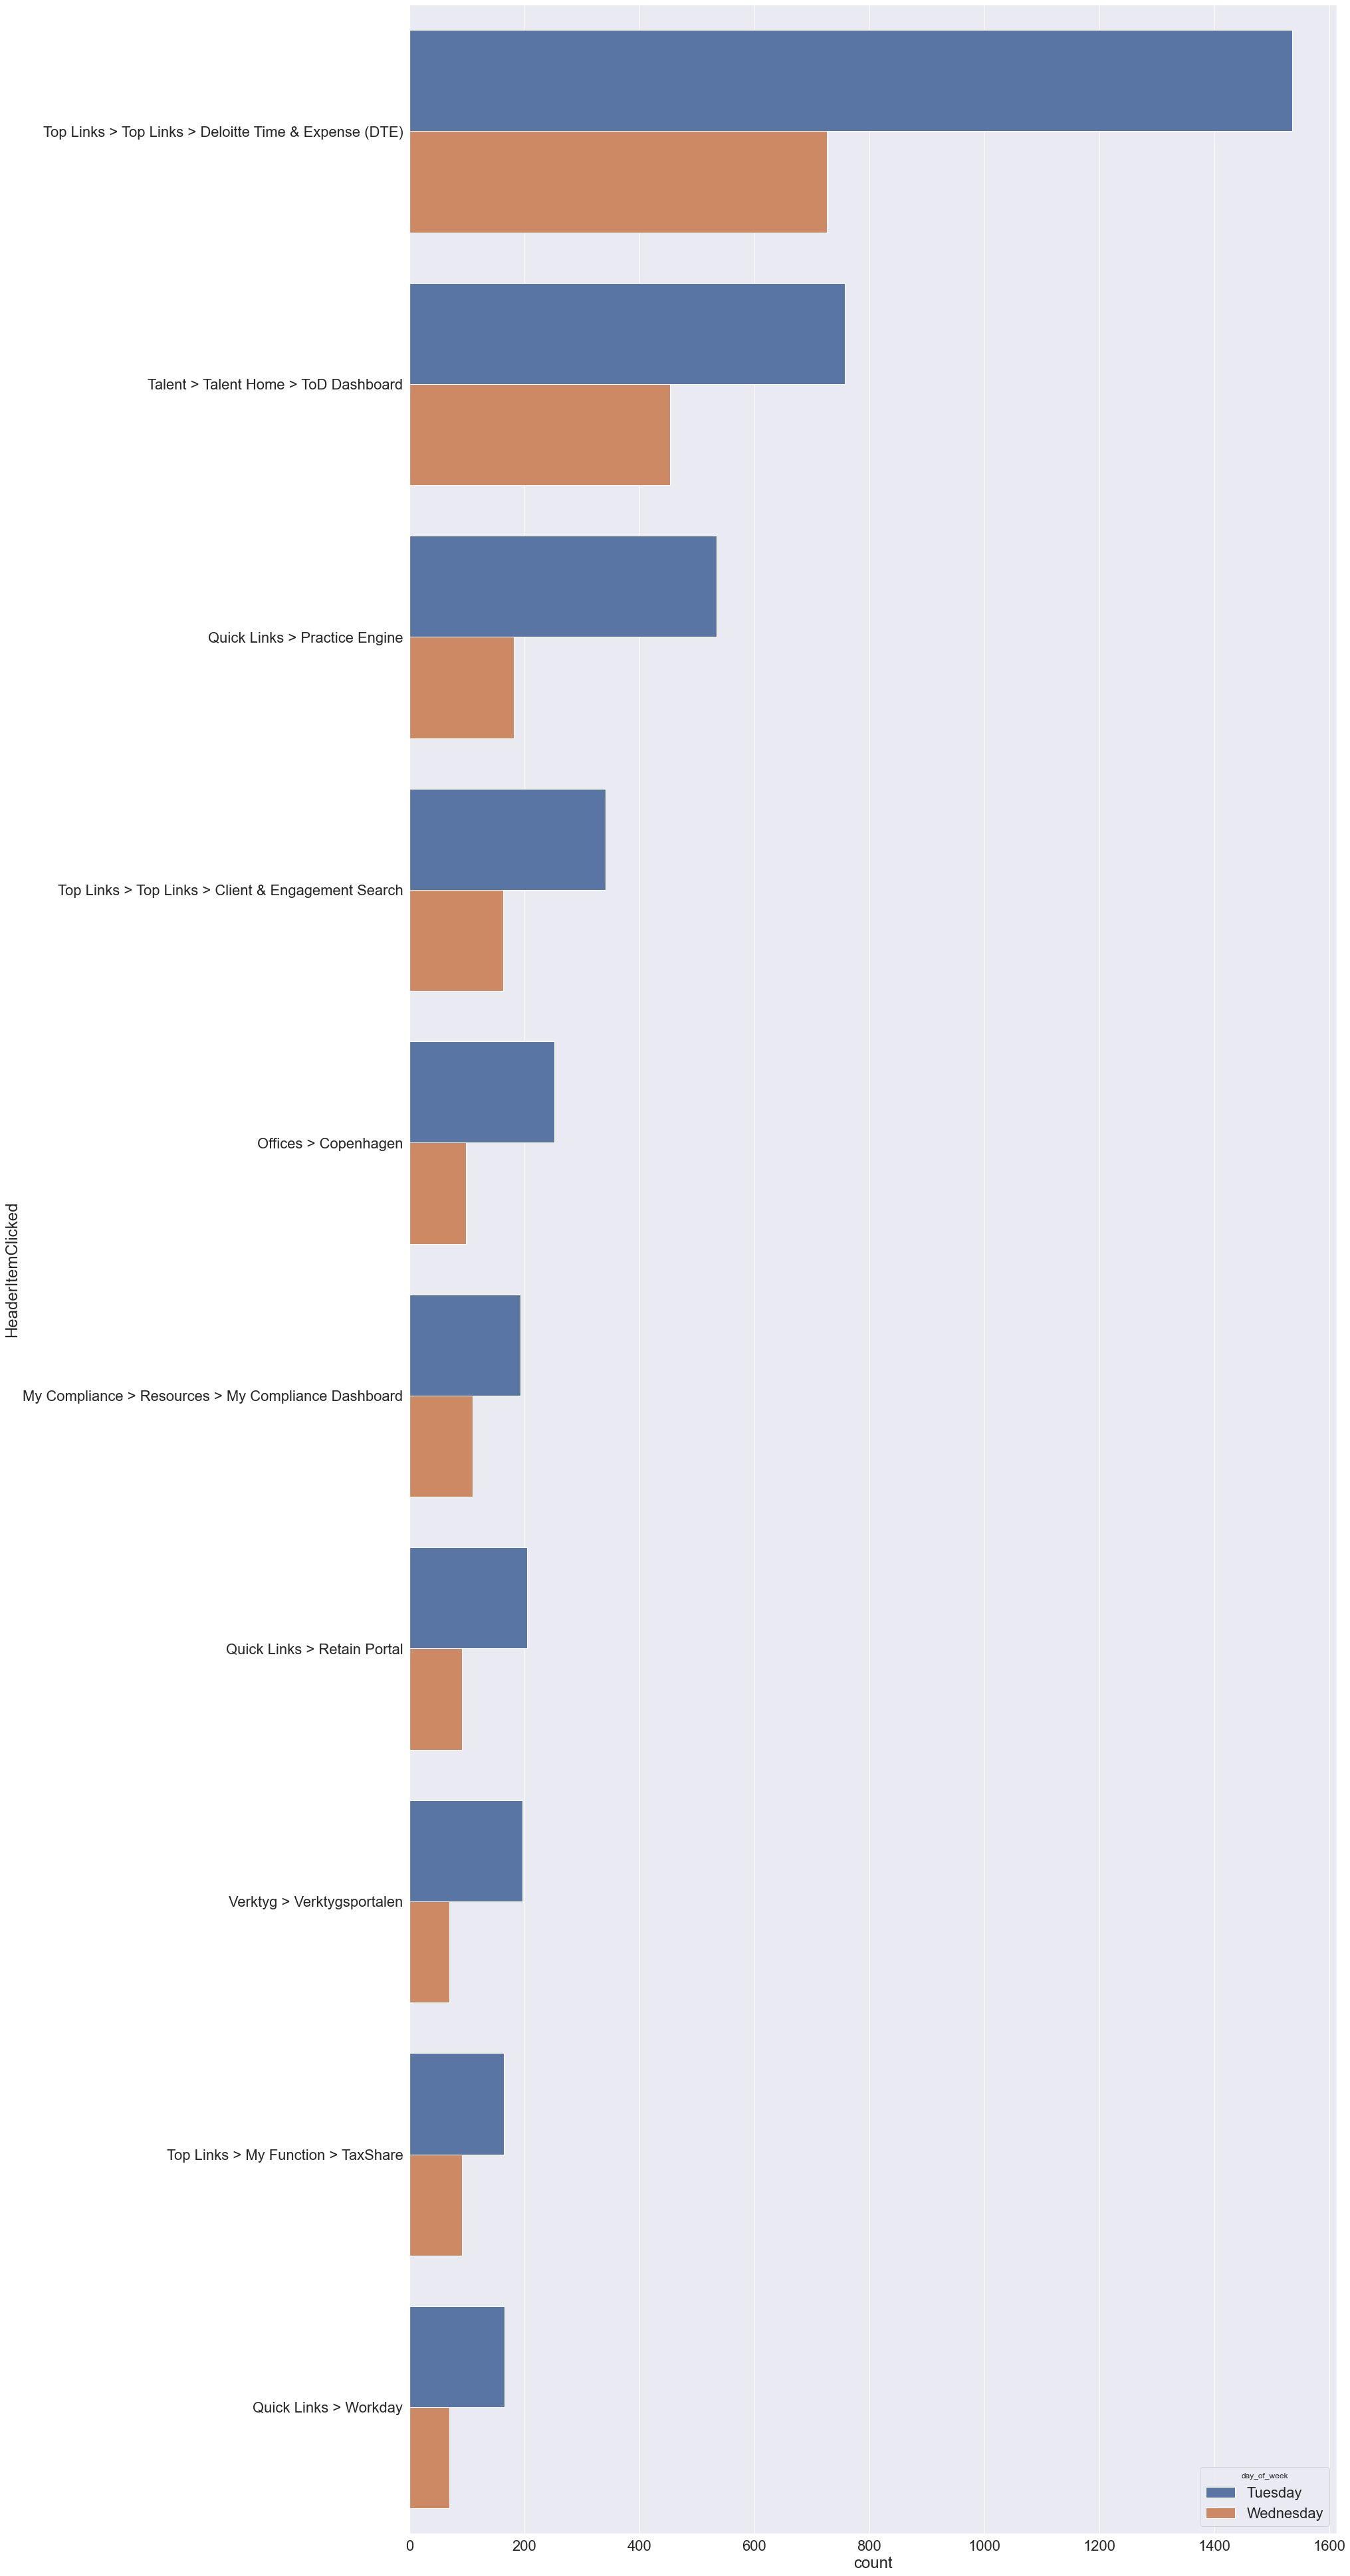

In [14]:
plt.figure(figsize=(25,70))
sns.set(font_scale=2) 
sns.set_style("darkgrid")


sns.countplot(y="HeaderItemClicked", data=analytics,order=analytics.HeaderItemClicked.value_counts().iloc[:10].index, hue='day_of_week')
